# Diwali Sales Data

The dataset provided contains sales data from a Diwali season, capturing various customer demographics and purchase details, such as age, gender, state, product category, and total purchase amount. The objective of this project is to clean and preprocess the dataset for further analysis and visualization. This process involves handling missing values, removing duplicates, transforming data types, and creating new features that will help in generating meaningful insights. The cleaned data will be visualized using Python’s `matplotlib` and `seaborn` libraries to explore sales trends, customer behavior, and product performance. Finally, the prepared dataset will be ready for further visual exploration using Tableau, enabling us to derive actionable insights and enhance business decisions.

### Part 1: Importing Libraries and Loading the Dataset

In [5]:
# Part 1: Import Libraries and Load the Dataset

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles for better visuals
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('Dataset_Diwali Sales.csv', encoding = 'unicode_escape')

# Preview the dataset to understand its structure
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Part 2: Inspecting the Dataset

In this step, we inspect the structure and attributes of the dataset, including data types, column names, and checking for missing or null values. This is important before making any transformations.

In [7]:
# Part 2: Inspect the Dataset

# Checking the info of the dataset
df.info()

# Checking for basic statistics and understanding the numeric data
df.describe()

# Checking for missing/null values
df.isnull().sum()

# Checking for duplicate rows
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


8

### Part 3: Dropping Unnecessary Columns

We identified some unnecessary columns (Status and unnamed1) that have no data or relevance to our analysis. We will drop them.

In [9]:
# Part 3: Dropping Unnecessary Columns

# Dropping 'Status' and 'unnamed1' columns as they contain no useful data
df_cleaned = df.drop(columns=['Status', 'unnamed1'])

# Verify that columns were dropped successfully
df_cleaned.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


### Part 4: Handling Missing Values

Next, we handle missing values, especially in the Amount column. Rows with missing values in this column will be dropped as they are essential for our analysis.

In [11]:
# Part 4: Handling Missing Values

# Dropping rows with missing values in the 'Amount' column
df_cleaned = df_cleaned.dropna(subset=['Amount'])

# Verifying that there are no more missing values in 'Amount'
df_cleaned.isnull().sum()


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### Part 5: Standardizing and Cleaning Column Names

Column names should be consistent and follow standard conventions. We will remove spaces and convert all column names to lowercase for easier handling.

In [13]:
# Part 5: Standardizing Column Names

# Standardizing column names by converting to lowercase and replacing spaces with underscores
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Check the new column names
df_cleaned.columns


Index(['user_id', 'cust_name', 'product_id', 'gender', 'age_group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount'],
      dtype='object')

### Part 6: Checking and Converting Data Types

We will ensure that columns like Amount and Orders are properly typed as numeric. If necessary, we will cast the data types.

In [15]:
# Part 6: Checking and Converting Data Types

# Checking data types
df_cleaned.dtypes

# Converting 'amount' to numeric if not already
df_cleaned['amount'] = pd.to_numeric(df_cleaned['amount'])

# Verify the data types again
df_cleaned.dtypes


user_id               int64
cust_name            object
product_id           object
gender               object
age_group            object
age                   int64
marital_status        int64
state                object
zone                 object
occupation           object
product_category     object
orders                int64
amount              float64
dtype: object

### Part 7: Removing Duplicates

It is essential to check for and remove any duplicate rows to avoid skewed analysis.

In [17]:
# Part 7: Checking for and Removing Duplicates

# Removing any duplicate rows from the dataset
df_cleaned = df_cleaned.drop_duplicates()

# Verifying if any duplicates remain
df_cleaned.duplicated().sum()


0

### Part 8: Creating New Useful Columns

We can create new columns such as total_order_value, which represents the product of Orders and Amount. This can be useful for visualizations showing total revenue per customer or product.

In [19]:
# Part 8: Creating New Useful Columns

# Creating a new column for total order value (Orders * Amount)
df_cleaned['total_order_value'] = df_cleaned['orders'] * df_cleaned['amount']

# Check the new column
df_cleaned.head()


,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount,total_order_value
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,71802.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,71772.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,47824.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,47754.0


### Part 9: Creating Visualizations
Now, we will create visualizations to explore and understand the Diwali sales dataset.

### Visualization 1: Distribution of Age Groups

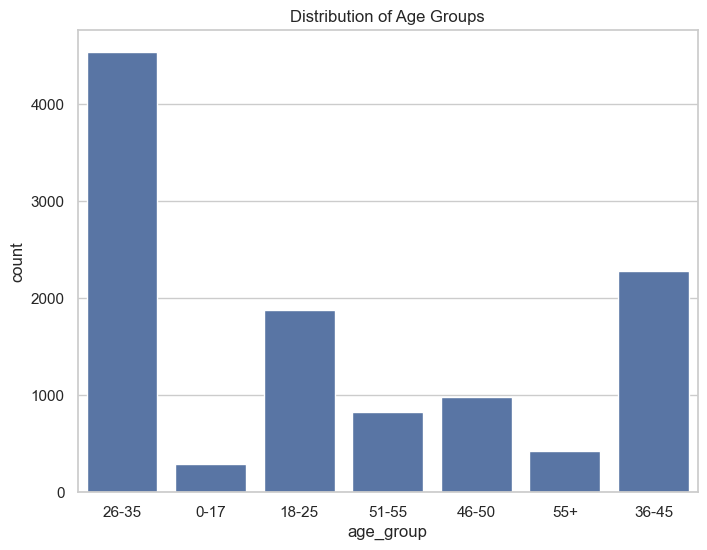

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='age_group', data=df_cleaned)
plt.title('Distribution of Age Groups')
plt.show()

### Visualization 2: Gender Distribution

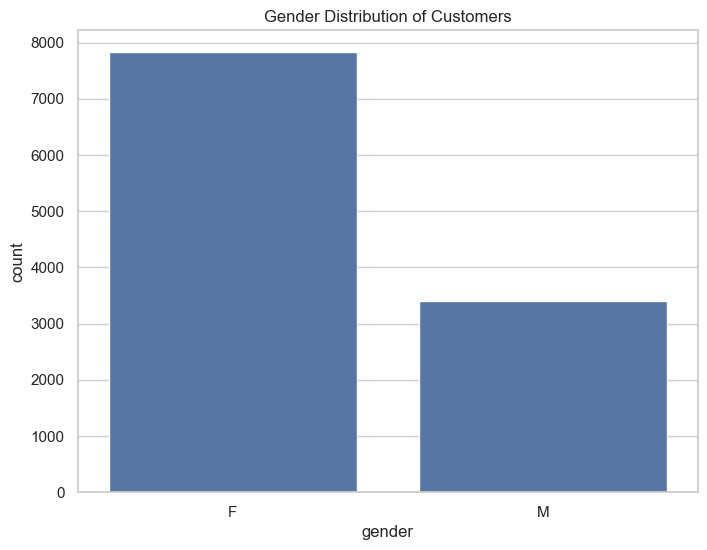

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', data=df_cleaned)
plt.title('Gender Distribution of Customers')
plt.show()

### Visualization 3: Total Order Value by Age Group

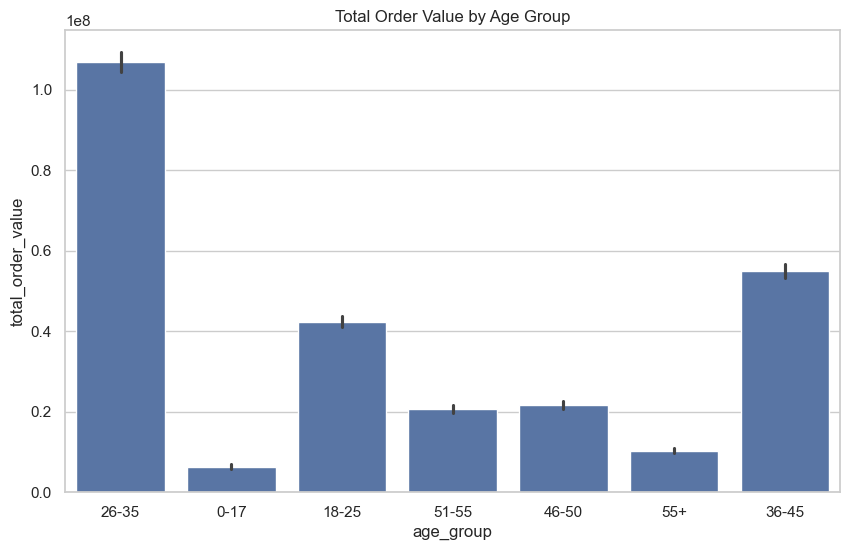

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='total_order_value', data=df_cleaned, estimator=sum)
plt.title('Total Order Value by Age Group')
plt.show()

### Visualization 4: Orders by Gender

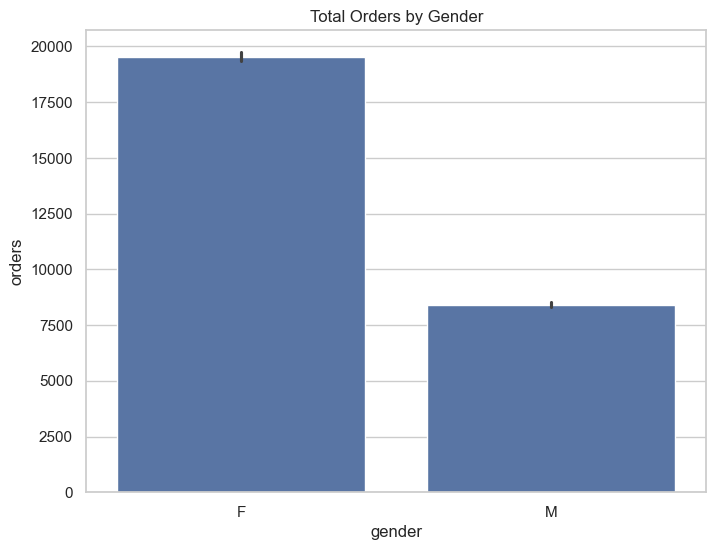

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='orders', data=df_cleaned, estimator=sum)
plt.title('Total Orders by Gender')
plt.show()

### Visualization 5: Total Revenue by State

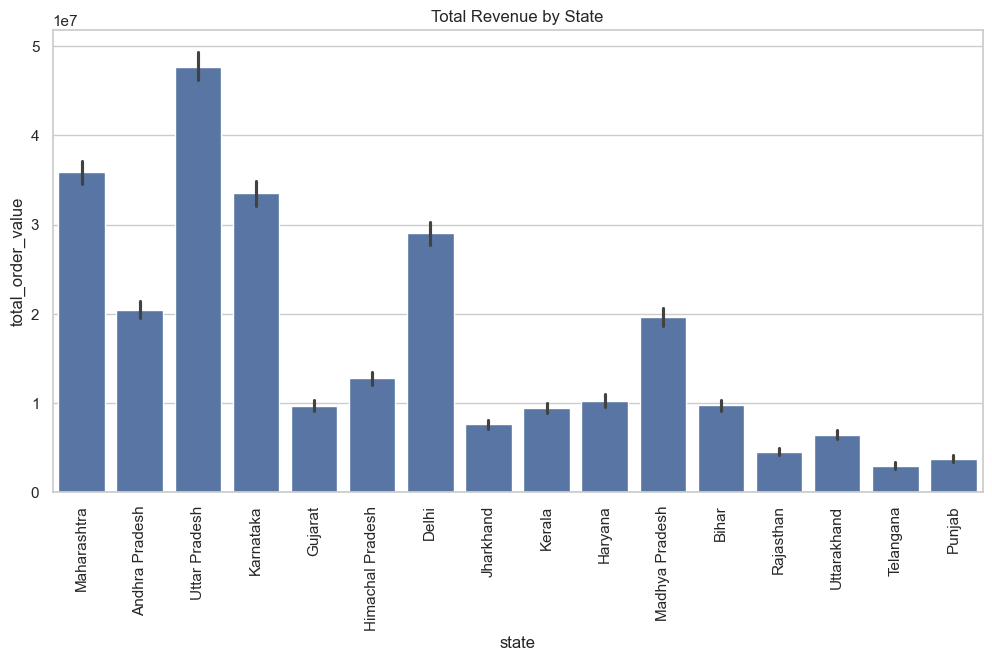

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='total_order_value', data=df_cleaned, estimator=sum)
plt.xticks(rotation=90)
plt.title('Total Revenue by State')
plt.show()

### Visualization 6: Average Amount Spent by Age Group

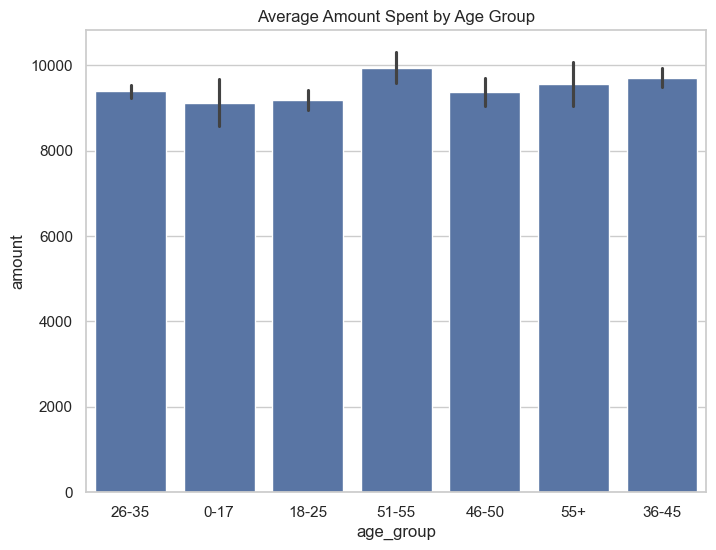

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x='age_group', y='amount', data=df_cleaned)
plt.title('Average Amount Spent by Age Group')
plt.show()

### Visualization 7: Number of Orders by Product Category

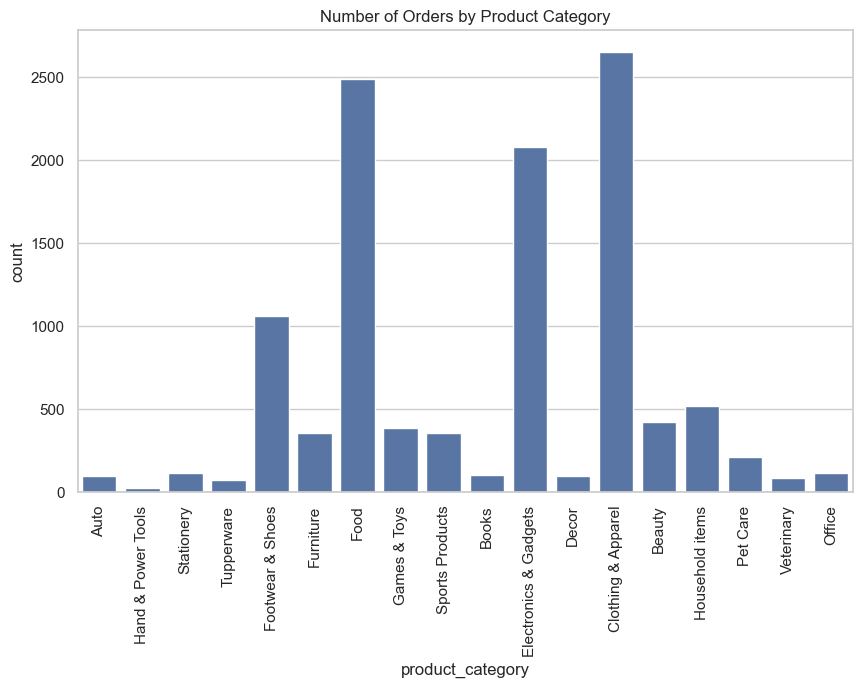

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='product_category', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Number of Orders by Product Category')
plt.show()

### Visualization 8: Average Total Order Value by Gender

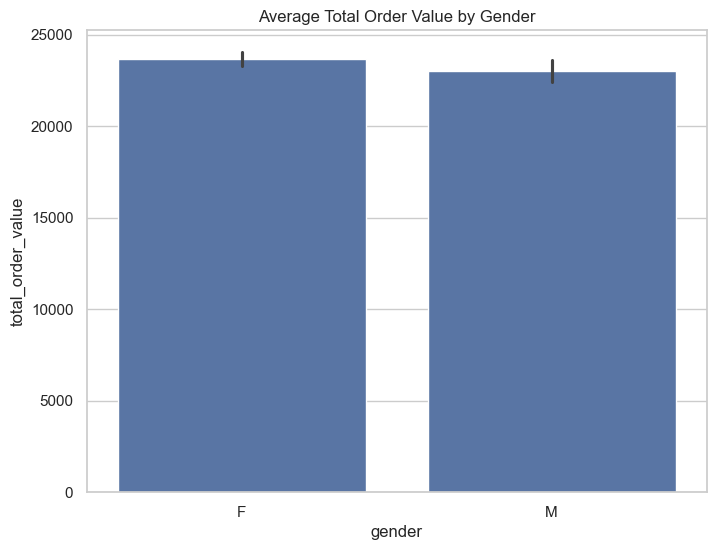

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='total_order_value', data=df_cleaned)
plt.title('Average Total Order Value by Gender')
plt.show()

### Visualization 9: Total Orders by Zone

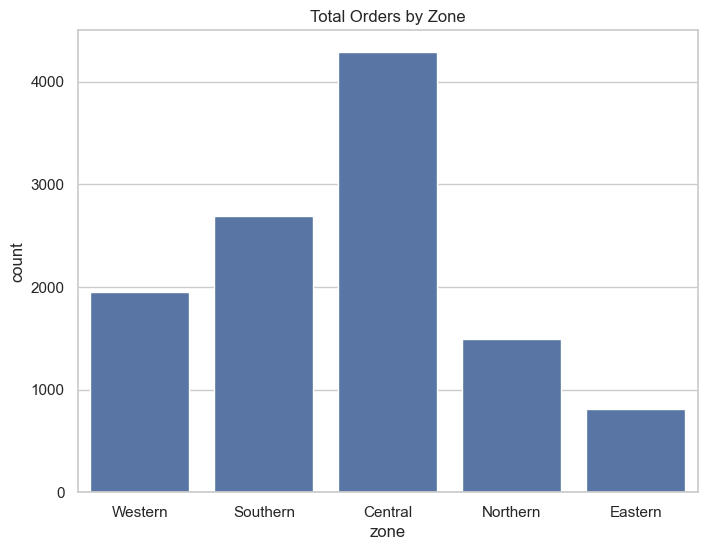

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='zone', data=df_cleaned)
plt.title('Total Orders by Zone')
plt.show()

### Visualization 10: Distribution of Amounts Spent

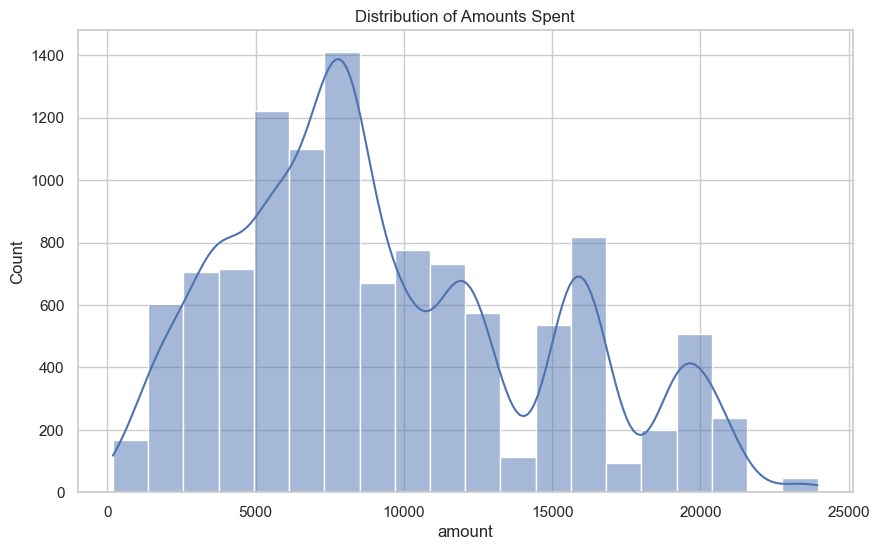

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['amount'], bins=20, kde=True)
plt.title('Distribution of Amounts Spent')
plt.show()

In this project, we successfully cleaned and transformed the Diwali sales dataset. We began by importing and inspecting the dataset, identifying 
missing values, duplicates, and inconsistencies in the data. After dropping unnecessary columns and handling null values, we standardized the column 
names and ensured that all data types were appropriate for analysis. We also created new features, such as `total_order_value`, to enhance the 
analytical depth of our visualizations. Finally, we generated 10 visualizations that highlighted customer demographics, sales performance by product 
category, and revenue distribution across different states and zones.

Through this process, we achieved a cleaner and more robust dataset that can now be used analysis and reporting. The insights derived from the cleaned dataset can help businesses make informed decisions about customer targeting, product offerings, and regional sales strategies during the Diwali season. This workflow demonstrated how systematic data cleaning and visualization can add immense value to raw data, turning it into actionable business intelligence.